In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import norm

# Modeling with pymc3

In [15]:
import pymc3 as pm

from pymc3 import Model, HalfCauchy, Normal, glm, plot_posterior_predictive_glm, sample

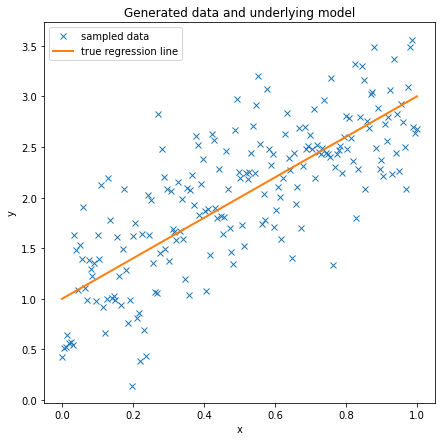

In [71]:
"""
Linear Model for training
"""

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y = true_regression_line + norm(loc=0, scale=0.5).rvs(size=size)

data = pd.DataFrame(dict(x=x, y=y))

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0)
plt.show()

In [72]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    _sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    _intercept = Normal("Intercept", 0, sigma=20)
    _x_coeff = Normal("x_coeff", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=_intercept + _x_coeff * x, sigma=_sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x_coeff, Intercept, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 14 seconds.


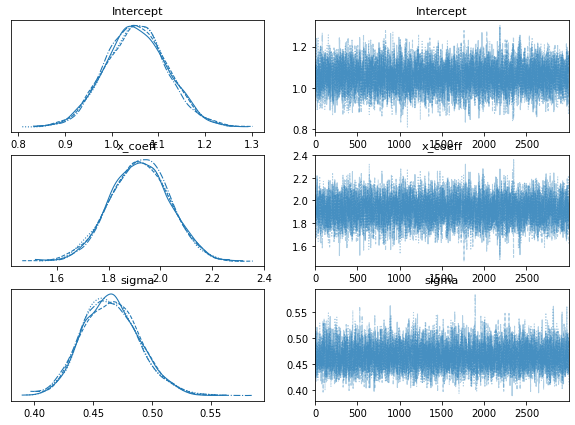

In [73]:
import arviz as az

az.plot_trace(trace, figsize=(10, 7));

/Users/wolfgang.spindeler/Library/Caches/pypoetry/virtualenvs/work-in-progress-M5OXFkRS-py3.9/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


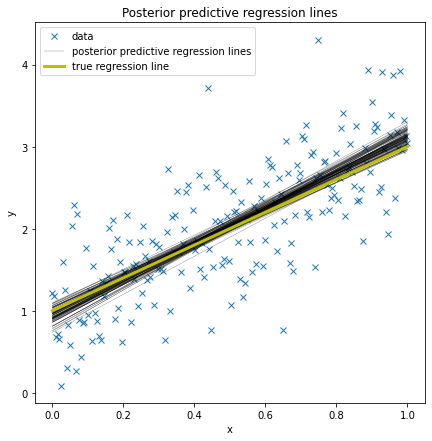

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, "x", label="data")
plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y");

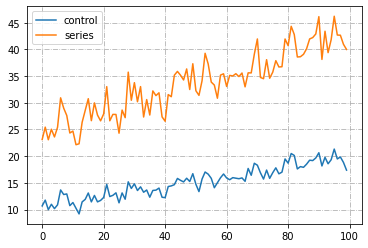

In [74]:
"""
Now our example, Forging some test data
"""

n = 100
x = np.linspace(0, 10, n)

intercept = 3
coeff = 2

control_series = pd.Series(norm(loc=10, scale=1).rvs(n)) + x
series = intercept + coeff * control_series + norm(loc=0, scale=1).rvs(n)

plt.plot(control_series, label="control")
plt.plot(series, label="series")
plt.legend()
plt.grid(linestyle="-.")

plt.show()

In [75]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    _sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    _intercept = Normal("Intercept", 0, sigma=20)
    _coeff = Normal("coeff", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=_intercept + _coeff * control_series, sigma=_sigma, observed=series)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coeff, Intercept, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 17 seconds.


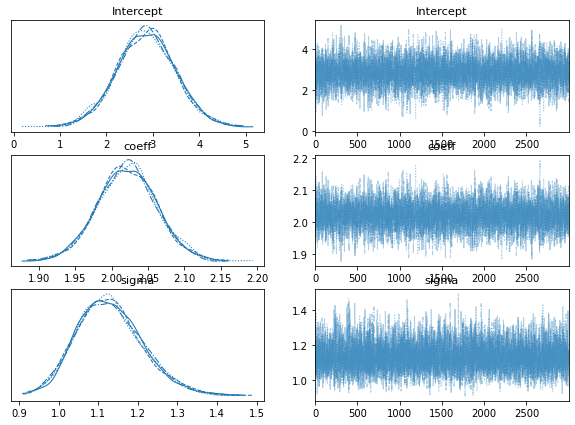

In [76]:
az.plot_trace(trace, figsize=(10, 7));

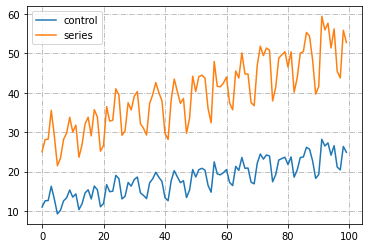

In [80]:
"""
With season
"""

cycle = np.array([1, 1, 1, 1, 1, 0, 0,])
season_flag = np.tile(cycle, int(n / len(cycle) + 1))[:n]
season_multiplier = season_flag * .33 + 1

control_series = (pd.Series(norm(loc=10, scale=1).rvs(n)) + x) * season_multiplier
series = intercept + coeff * control_series + norm(loc=0, scale=.1).rvs(size=n)


plt.plot(control_series, label="control")
plt.plot(series, label="series")
plt.legend()
plt.grid(linestyle="-.")

plt.show()

In [81]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    _sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    _intercept = Normal("Intercept", 0, sigma=20)
    _coeff = Normal("coeff", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=_intercept + _coeff * control_series, sigma=_sigma, observed=series)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coeff, Intercept, sigma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8820204432489627, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


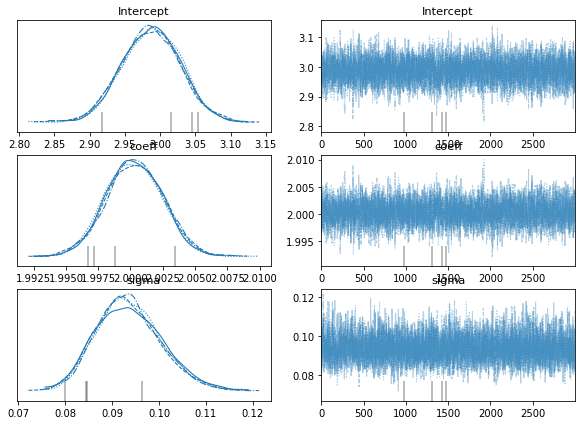

In [82]:
az.plot_trace(trace, figsize=(10, 7));